<a href="https://colab.research.google.com/github/JakeOh/202007_iw_pyda_wkd/blob/master/py13_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import matplotlib.pyplot as plt  # 시각화 모듈
import seaborn as sns # 그래픽 패키지. matplotlib의 기능을 향상시킨 패키지.
import pandas as pd  # 데이터프레임을 다루기 위한 패키지

In [5]:
# seaborn 패키지가 제공하는 예제 데이터 이용
tips = sns.load_dataset('tips')
print(type(tips))

<class 'pandas.core.frame.DataFrame'>


In [7]:
# tips DF에서 첫 5개 row를 선택
tips.iloc[:5]  # tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [8]:
# tips DF에서 마지막 5개 row 검색
tips.iloc[-5:]  # tips.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [9]:
tips.shape

(244, 7)

In [10]:
# 요약 기술 통계량 - 수치형 데이터들의 통계값(평균, 표준편차, ...)
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [11]:
# 범주형 자료(categorical data) -> 빈도수, 비율
tips['sex'].value_counts()

Male      157
Female     87
Name: sex, dtype: int64

In [14]:
tips['day'].value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

In [16]:
# 목요일, 남성의 전체금액, 팁, 요일, 성별 출력
tips[(tips['day'] == 'Thur') & (tips['sex'] == 'Male')][['total_bill', 'tip', 'day', 'sex']]

,total_bill,tip,day,sex
77,27.20,4.00,Thur,Male
78,22.76,3.00,Thur,Male
79,17.29,2.71,Thur,Male
80,19.44,3.00,Thur,Male
81,16.66,3.40,Thur,Male
83,32.68,5.00,Thur,Male
84,15.98,2.03,Thur,Male
86,13.03,2.00,Thur,Male
87,18.28,4.00,Thur,Male
88,24.71,5.85,Thur,Male


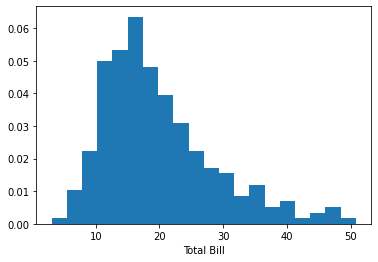

In [24]:
# 히스토그램(histogram):
# 연속형 변수를 일정한 구간으로 나눠서,
# 그 구간 안에 포함된 데이터의 개수를 막대그래프로 표현.
plt.hist(x=tips['total_bill'], bins=20, density=True)
# bins: 막대 개수(기본값은 10). 구간의 가로 길이 = (max - min) / bins
# density: y축을 커널 밀도로 표현할 지 말 지를 결정(기본값은 False).

plt.xlabel('Total Bill')
plt.show()

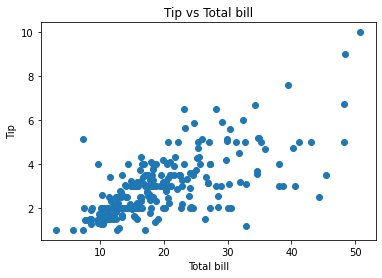

In [30]:
# 산점도 그래프(scatter plot)
# 두 변수 간의 상관관계를 파악.
# tip ~ total_bill 관계
plt.scatter(x=tips['total_bill'], y=tips['tip'])

plt.xlabel('Total bill')
plt.ylabel('Tip')
plt.title('Tip vs Total bill')
plt.show()

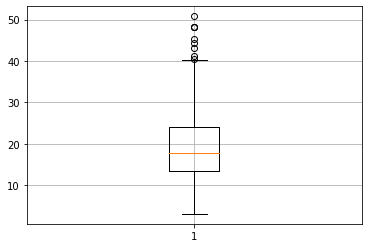

In [32]:
# 상자 그림(box plot): 
# 요약 기술 통계량(최솟값, 최댓값, 중앙값, 25%, 75%)을 상자로 표현.
plt.boxplot(x=tips['total_bill'])
plt.grid()
plt.show()

In [34]:
# 성별 tip의 차이?
tips.groupby('sex')['tip'].describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
Male,157.0,3.089618,1.489102,1.0,2.0,3.00,3.76,10.0
Female,87.0,2.833448,1.159495,1.0,2.0,2.75,3.50,6.5


In [35]:
tips_female = tips[tips['sex'] == 'Female']['tip']
tips_female

0      1.01
4      3.61
11     5.00
14     3.02
16     1.67
       ... 
226    2.00
229    2.88
238    4.67
240    2.00
243    3.00
Name: tip, Length: 87, dtype: float64

In [37]:
tips_male = tips[tips['sex'] == 'Male']['tip']
tips_male

1      1.66
2      3.50
3      3.31
5      4.71
6      2.00
       ... 
236    1.00
237    1.17
239    5.92
241    2.00
242    1.75
Name: tip, Length: 157, dtype: float64

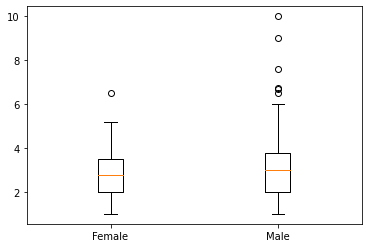

In [39]:
# 성별 tip의 상자 그림
plt.boxplot(x = [tips_female, tips_male],
            labels=['Female', 'Male'])
plt.show()

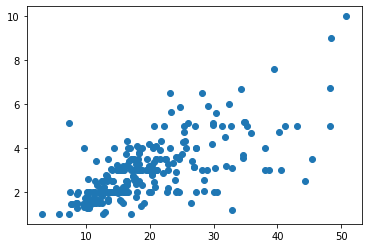

In [45]:
# plot(): 선 그래프(인구 ~ 연도), 산점도 그래프
plt.plot(tips['total_bill'], tips['tip'], linestyle='', marker='o')
plt.show()